In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income_70K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '32f0c940-8892-4b94-8af3-7dbe2e795257'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)

client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(456, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.795760,1.000000,0.000000,0.853128,1.000000,0.000000,0.762341,1.000000,0.000000,0.806600
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.750635,1.000000,0.000000,0.761662,1.000000,0.000000,0.747790,1.000000,0.000000,0.754600
12,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 22:12:43.475,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.805233,1.000000,0.000000,0.853128,1.000000,0.000000,0.777951,1.000000,0.000000,0.814600
13,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 22:12:43.485,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.749250,1.000000,0.000000,0.760644,1.000000,0.000000,0.747005,1.000000,0.000000,0.753700
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.611138,0.556887,0.822511,0.568322,0.524914,0.820466,0.633864,0.575239,0.821917,0.601912
25,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.651735,0.596518,0.817949,0.629740,0.573133,0.810641,0.655927,0.600629,0.819880,0.643072
36,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 22:12:43.475,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.627723,0.575114,0.845225,0.580016,0.535377,0.839311,0.648118,0.592358,0.843475,0.614918
37,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 22:12:43.485,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.640686,0.583849,0.810517,0.616746,0.559699,0.798032,0.645080,0.587665,0.814604,0.631170
48,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.611790,1.000000,0.000000,0.593182,1.000000,0.000000,0.619375,1.000000,0.000000,0.610081
49,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.699485,1.000000,0.000000,0.653436,1.000000,0.000000,0.721837,1.000000,0.000000,0.692943


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.795760,1.000000,0.000000,0.853128,1.000000,0.000000,0.762341,1.000000,0.000000,0.806600
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.611138,0.556887,0.822511,0.568322,0.524914,0.820466,0.633864,0.575239,0.821917,0.601912
48,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.611790,1.000000,0.000000,0.593182,1.000000,0.000000,0.619375,1.000000,0.000000,0.610081
72,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.496471,0.000000,1.000000,0.496139,0.000000,1.000000,0.495418,0.000000,1.000000,0.495667
96,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.066965,0.000000,1.000000,0.052618,0.000000,1.000000,0.077507,0.000000,1.000000,0.063857
120,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.060150,0.054217,0.083267,0.054931,0.050210,0.082355,0.063351,0.056978,0.083793,0.059246
144,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.059702,0.041276,0.131492,0.047404,0.032763,0.132446,0.066004,0.045892,0.130519,0.056936
168,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.914909,0.941864,0.809890,0.932326,0.953566,0.808953,0.906139,0.935669,0.811412,0.918905
192,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.723085,0.745777,0.634669,0.769052,0.794529,0.621065,0.695293,0.712353,0.640570,0.731250
216,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-25 20:26:33.757,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.621677,0.566515,0.836597,0.577929,0.533805,0.834229,0.645043,0.585448,0.836207,0.612325


In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.750635,1.000000,0.000000,0.761662,1.000000,0.000000,0.747790,1.000000,0.000000,0.754600
25,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.651735,0.596518,0.817949,0.629740,0.573133,0.810641,0.655927,0.600629,0.819880,0.643072
49,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.699485,1.000000,0.000000,0.653436,1.000000,0.000000,0.721837,1.000000,0.000000,0.692943
73,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.417824,0.000000,1.000000,0.466376,0.000000,1.000000,0.389744,0.000000,1.000000,0.422764
97,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.081914,0.000000,1.000000,0.072484,0.000000,1.000000,0.093181,0.000000,1.000000,0.081876
121,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.066399,0.060838,0.083135,0.063759,0.058057,0.081979,0.066998,0.061421,0.083535,0.065408
145,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.068747,0.051248,0.121422,0.061638,0.044198,0.117370,0.072312,0.054676,0.124602,0.067072
169,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.902876,0.928500,0.825743,0.913471,0.938960,0.832017,0.897073,0.922855,0.820631,0.905123
193,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.636808,0.633722,0.646099,0.685950,0.698295,0.646499,0.610611,0.599925,0.642296,0.647595
217,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-25 20:26:34.332,32f0c940-8892-4b94-8af3-7dbe2e795257,Exp_iter_1,...,0.663513,0.607590,0.831851,0.641049,0.583703,0.824313,0.667843,0.611847,0.833868,0.654690


In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.000721,-0.050631,0.014544,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.024889,-0.013977,-0.022498,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.000721,0.050631,-0.014544,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.110457,1.038039,1.202799,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.069514,0.024720,0.131025,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.090787,0.054803,0.095679,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.028900,1.027811,1.038547,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.008420,-0.004844,-0.007977,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.005982,-0.003684,-0.005856,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.870000,0.916041,0.866193,RandomForestClassifier,Exp_iter_1,0.7,0


In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.000721,-0.050631,0.014544,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.024889,-0.013977,-0.022498,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.000721,0.050631,-0.014544,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.110457,1.038039,1.202799,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.069514,0.024720,0.131025,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [16]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [17]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

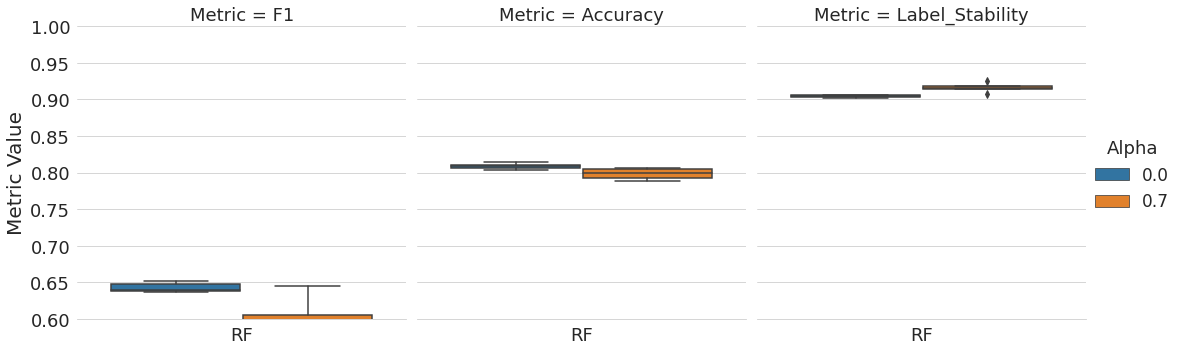

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

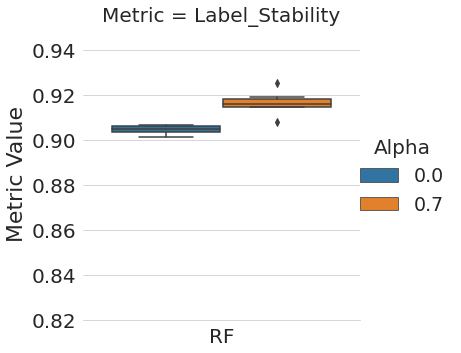

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

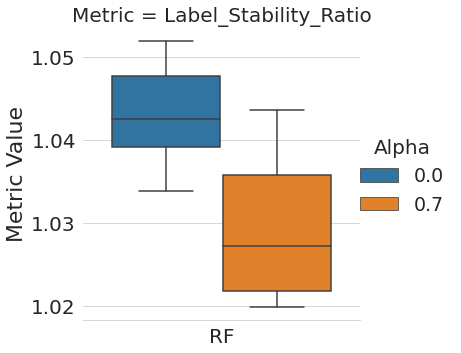

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

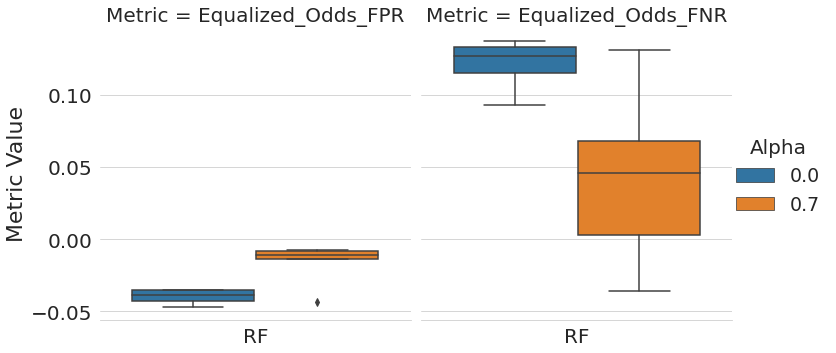

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [22]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 864x432 with 0 Axes>

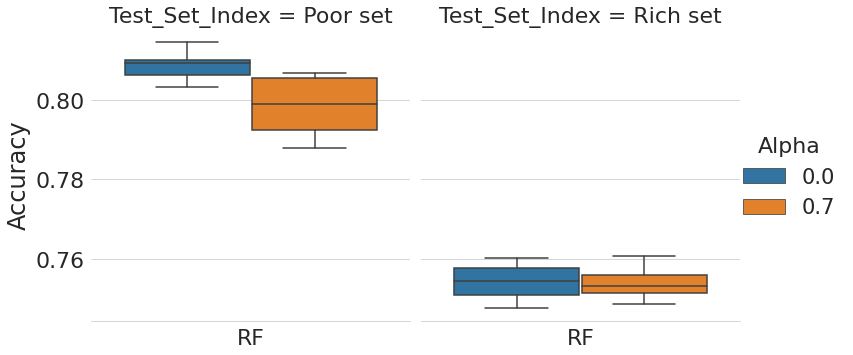

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

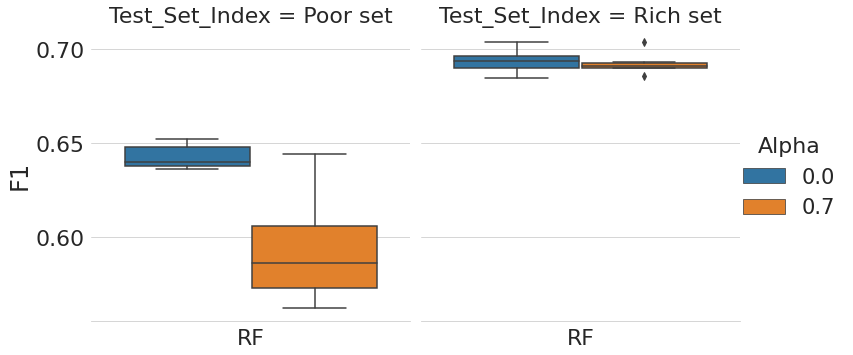

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

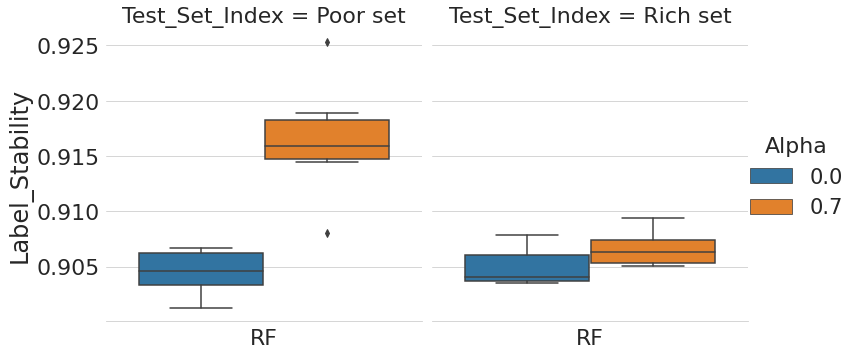

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

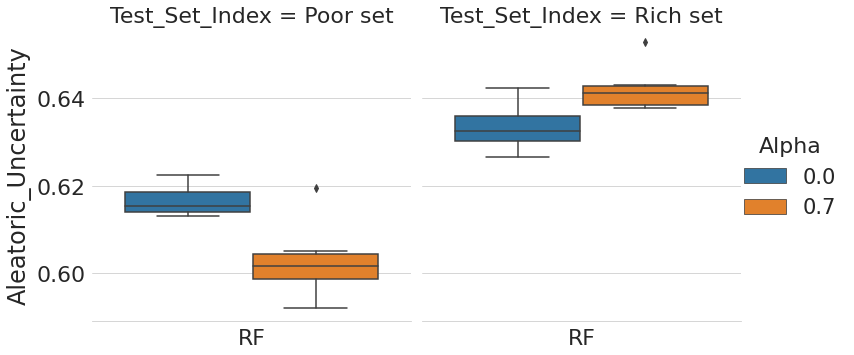

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

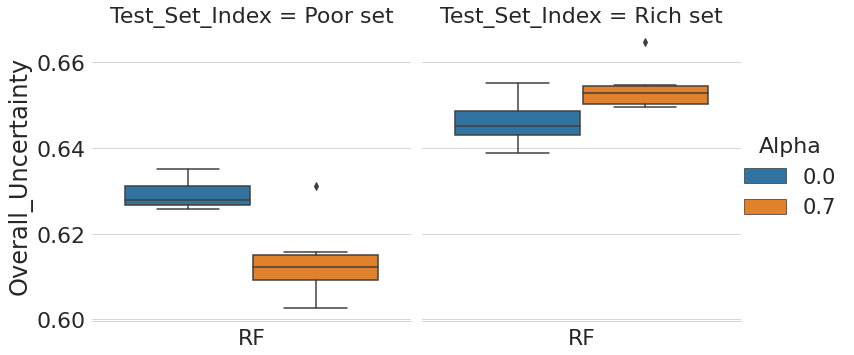

In [27]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

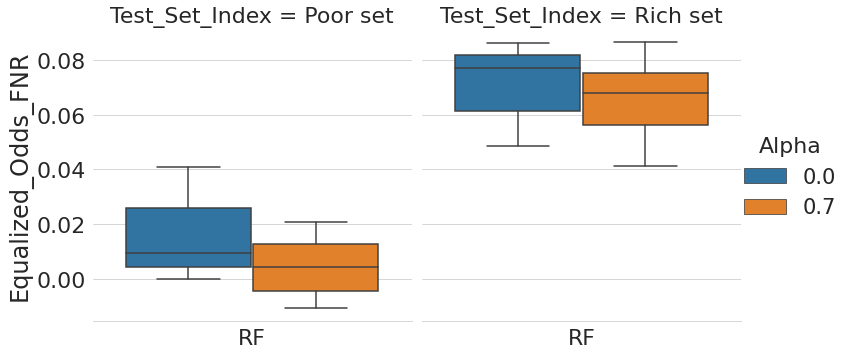

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

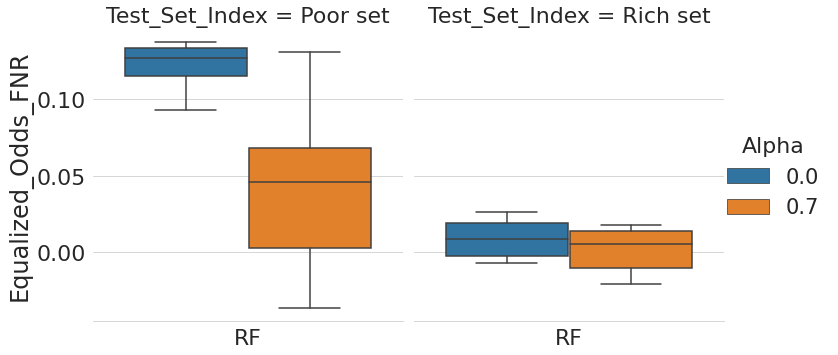

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

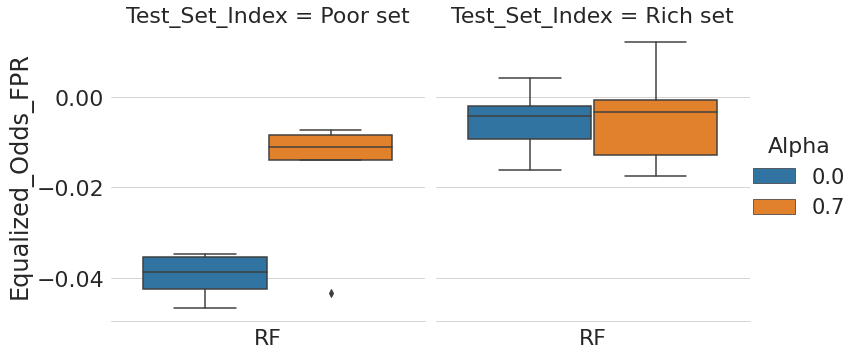

In [30]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)